In [28]:

#pip install pandas-profiling


In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling


import seaborn as sns #plots
import matplotlib.pyplot as plt #more plots
import sklearn as sk #machine learning

In [102]:
data = pd.read_csv("C://Users//Susmitha Reddy//OneDrive - Florida Polytechnic University//Desktop//computational//Project//Heart disease prediction.csv")
data.head(5)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [103]:
#Displays all details of descriptive analysis on data
report = pandas_profiling.ProfileReport(data)

display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [104]:
print(data.columns)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


# Data Cleaning

 Here I want to change the column name Males as gender
 
 And here Gender as  0 = Female; 1 = Male

In [105]:
data.rename(columns={'male':'gender'}, inplace=True)

In [106]:
print(data.columns)

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [107]:
data.head(5)

gender  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       1   39        4.0              0         0.0     0.0                0   
1       0   46        2.0              0         0.0     0.0                0   
2       1   48        1.0              1        20.0     0.0                0   
3       0   61        3.0              1        30.0     0.0                0   
4       0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

Total, there are 16 features. To determine whether a person has/will have congestive heart failure, I predict that gender, total cholesterol, and TenYearCHD are the most important factors.


In [108]:
# showing how many coumns have null values
data.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Here we don't have any use with the education so I want to drop the education

In [109]:
data = data.drop(['education'], axis=1)

In [110]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_imputer.fit(data)
imputed_data = pd.DataFrame(my_imputer.transform(data))

# Imputation removed column names; put them back
imputed_data.columns = data.columns

In [111]:
imputed_data.isna().sum()

gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Analyzing Features using Visualizations

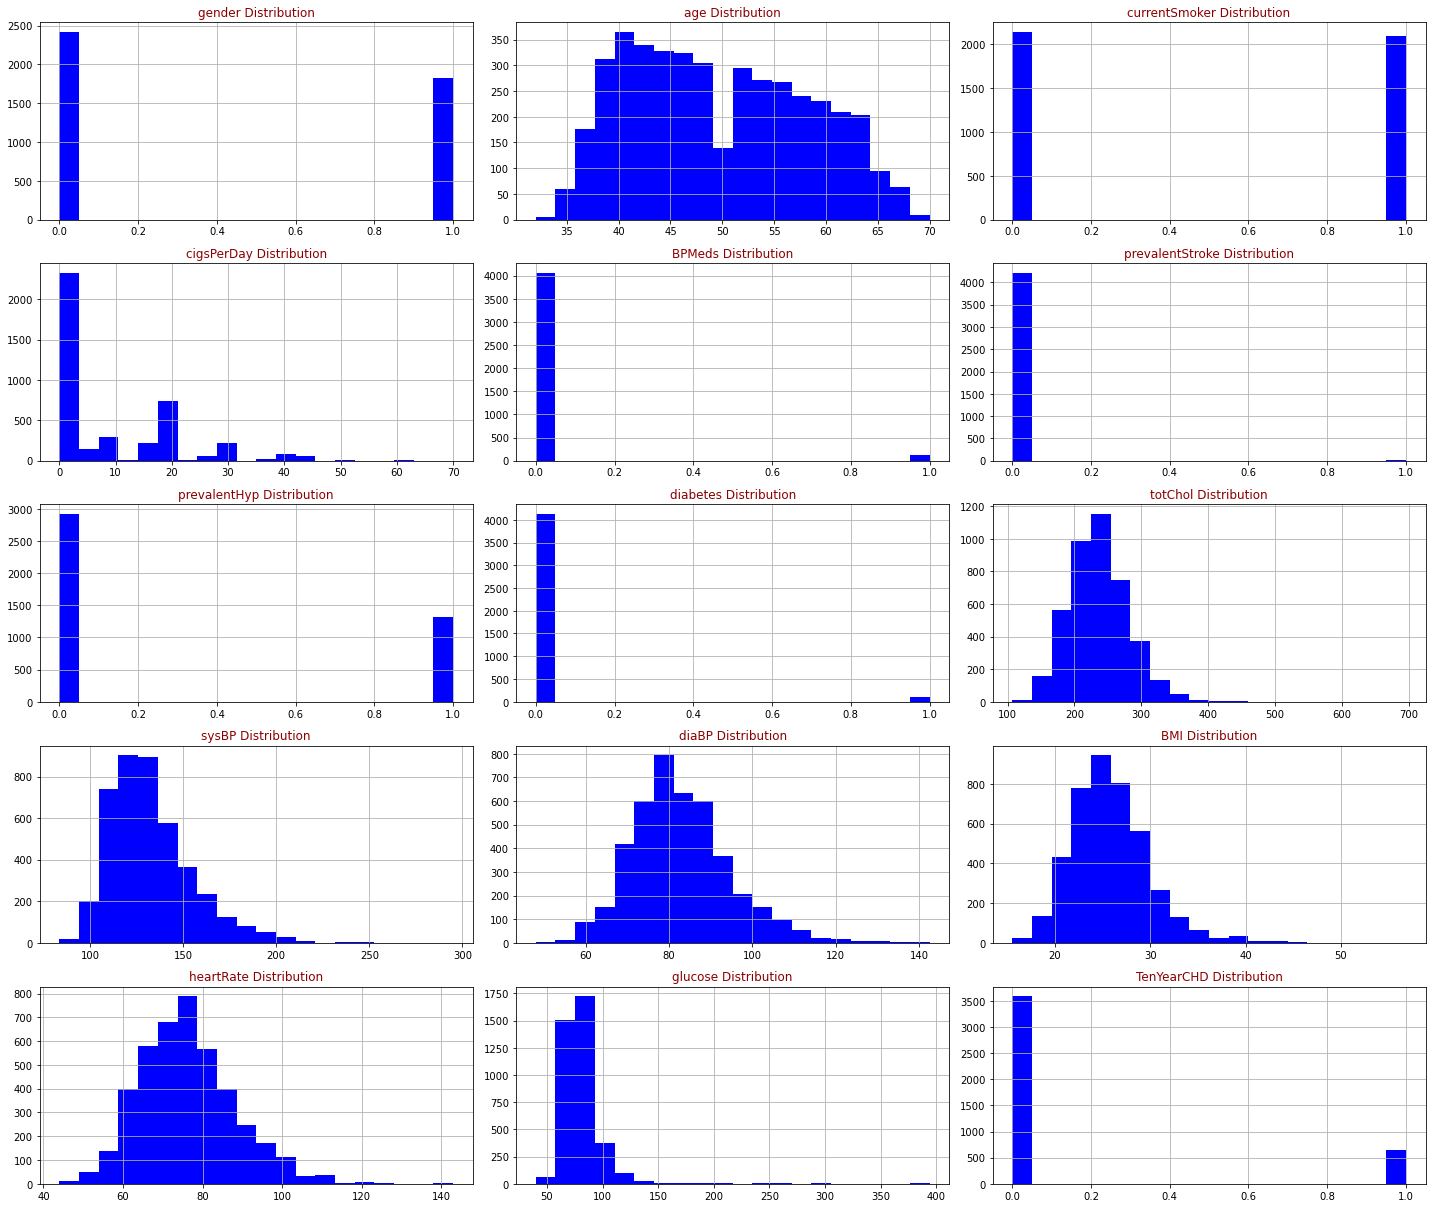

In [112]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='Blue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
        
draw_histograms(data,data.columns,6,3)

The data on the prevalent stroke, diabetes, and blood pressure meds are poorly balanced

# Data Distribution

To test the models' accuracy, we must set aside some training data and some testing data.

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
y = imputed_data['TenYearCHD']
X = imputed_data.drop(['TenYearCHD'], axis = 1)

# divide
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=14)


# Standardization

In [114]:
#Creating a set of features that are standardized
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = pd.DataFrame(scaler.fit_transform(X_train))
X_test_std = pd.DataFrame(scaler.transform(X_test))

X_train_std.columns = X_train.columns
X_test_std.columns = X_test.columns

X_train_std



gender       age  currentSmoker  cigsPerDay    BPMeds  \
0    -0.862454  1.667583      -0.991189   -0.760546 -0.180222   
1     1.159482 -1.236390      -0.991189   -0.760546 -0.180222   
2    -0.862454  0.505994      -0.991189   -0.760546 -0.180222   
3    -0.862454 -0.307119       1.008889    0.074405 -0.180222   
4    -0.862454 -1.236390      -0.991189   -0.760546 -0.180222   
...        ...       ...            ...         ...       ...   
3385 -0.862454 -0.307119       1.008889   -0.510061 -0.180222   
3386  1.159482  2.132219      -0.991189   -0.760546 -0.180222   
3387 -0.862454 -0.655596      -0.991189   -0.760546 -0.180222   
3388  1.159482 -0.887913       1.008889   -0.008832 -0.180222   
3389  1.159482 -1.004072       1.008889    1.744306 -0.180222   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0           -0.078951      1.483622  -0.16325  1.260464  0.343849  0.097599   
1           -0.078951     -0.674026  -0.16325  0.470667 -1.236446 -1.159793   
2           -0.078951      1.483622  -0.16325  0.470667  0.705059  0.852035   
3           -0.078951     -0.674026  -0.16325 -0.725310 -1.146143 -1.243619   
4           -0.078951     -0.674026  -0.16325  0.515799 -1.462202 -0.698749   
...               ...           ...       ...       ...       ...       ...   
3385        -0.078951     -0.674026  -0.16325 -0.138604  0.050366 -0.573010   
3386        -0.078951      1.483622  -0.16325  0.876848 -0.243118 -1.369358   
3387        -0.078951     -0.674026  -0.16325  0.109618 -0.378571 -0.866401   
3388        -0.078951     -0.674026  -0.16325 -0.273998 -0.446298 -0.237705   
3389        -0.078951      1.483622  -0.16325  1.237898  0.885664 -0.824488   

           BMI  heartRate   glucose  
0     2.157868   0.605288 -0.265448  
1    -0.409651  -1.975949 -0.126434  
2    -1.290855  -0.144103  0.614973  
3    -0.608475   1.188148  1.217367  
4    -1.290855   1.687743 -0.728827  
...        ...        ...       ...  
3385  0.000268  -0.060837 -0.404461  
3386  0.002723  -0.060837  1.032015  
3387 -0.662476  -0.726963  0.058918  
3388 -0.056188   1.188148  0.383284  
3389 -0.137190  -0.060837  1.402718  

[3390 rows x 14 columns]

# Normalization

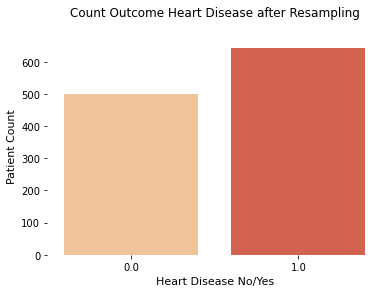

In [115]:
shuffled_df = imputed_data.sample(frac=1,random_state=5)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]
#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=500,random_state=42)

# Concatenate(join) both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

Without a thorough analysis of this data, models will be more likely to predict that a patient does not have heart disease. The unbalance will be resolved by splitting training and testing data and then balancing the training data. To ensure that the training data is balanced, I will undersample.

           Specs       Score
9          sysBP  589.552583
13       glucose  347.732361
3     cigsPerDay  240.332478
1            age  224.595880
8        totChol  150.306441
10         diaBP  118.675543
6   prevalentHyp   74.044778
7       diabetes   30.750977
4         BPMeds   27.563770
0         gender   17.316965


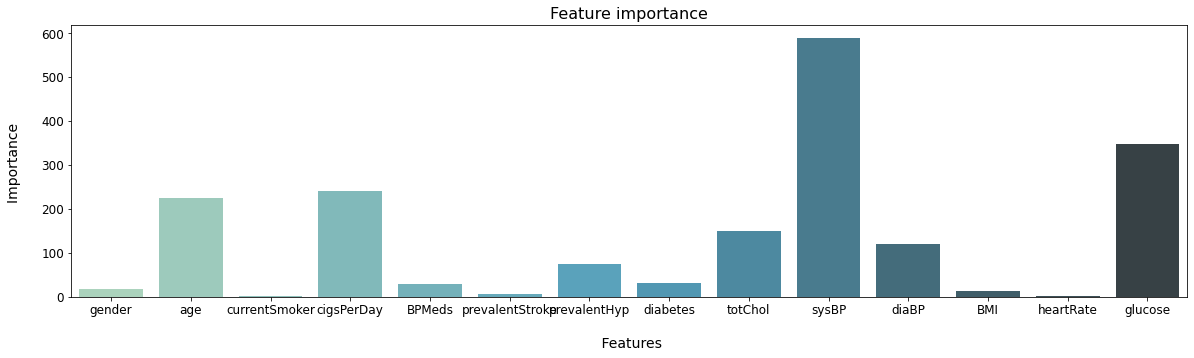

In [116]:
#scipy.stats.chi2() is an chi square continuous random variable that is defined with a standard format and some shape parameters to complete its specification.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#find best scored 6 features
select_feature = SelectKBest(chi2, k=10).fit(X_train, y_train)

dfscores = pd.DataFrame(select_feature.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
top_featureScores = featureScores.nlargest(10,'Score')
print(top_featureScores)

plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [117]:
#Making a dataset with only the top 10 features
best_feature_names = top_featureScores['Specs']

X_best_train = X_train[best_feature_names]
X_best_test = X_test[best_feature_names]
#y_best_train = y_train[best_feature_names]
#y_best_test = y_test[best_feature_names]

X_best_train

sysBP  glucose  cigsPerDay   age  totChol  diaBP  prevalentHyp  \
1133  140.0     76.0    0.000000  64.0    293.0   84.0           1.0   
287   105.0     79.0    0.000000  39.0    258.0   69.0           0.0   
1469  148.0     95.0    0.000000  54.0    258.0   93.0           1.0   
2753  107.0    108.0   10.000000  47.0    205.0   68.0           0.0   
283   100.0     66.0    0.000000  39.0    260.0   74.5           0.0   
...     ...      ...         ...   ...      ...    ...           ...   
1232  133.5     73.0    3.000000  47.0    231.0   76.0           0.0   
3833  127.0    104.0    0.000000  68.0    276.0   66.5           1.0   
2454  124.0     83.0    0.000000  44.0    242.0   72.5           0.0   
1292  122.5     90.0    9.003089  42.0    225.0   80.0           0.0   
2667  152.0    112.0   30.000000  41.0    292.0   73.0           1.0   

      diabetes  BPMeds  gender  
1133       0.0     0.0     0.0  
287        0.0     0.0     1.0  
1469       0.0     0.0     0.0  
2753       0.0     0.0     0.0  
283        0.0     0.0     0.0  
...        ...     ...     ...  
1232       0.0     0.0     0.0  
3833       0.0     0.0     1.0  
2454       0.0     0.0     0.0  
1292       0.0     0.0     1.0  
2667       0.0     0.0     1.0  

[3390 rows x 10 columns]

# Applying Models 

# 1.Logistic Regression 

## Tuning Parameters

The benefits of parameter tuning include increasing your model's accuracy, decreasing its runtime, and lowering its cost. Models from sklearn [2] and other libraries will have parameters that differ; however, these common algorithms have a considerable amount in common.


In [118]:
from sklearn.linear_model import LogisticRegression

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

In [119]:
# Using a gridsearch to tune parameters
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(LR_model, tuned_parameters,cv=10)

GS.fit(X_train_std, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [120]:
print(GS.best_params_)

{'C': 0.1, 'penalty': 'l2'}


In [121]:
LR_model= LogisticRegression(C=0.1, penalty='l2')



## Standerdaised Prediction

In [122]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
#Fitting the model to the standardized data
LR_model.fit(X_train_std, y_train)

#Using the model to predict
y_pred = LR_model.predict(X_test_std)
y_pred

#Getting the accuracies

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, y_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, y_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, y_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 85.5%
The f1 score for LogReg is: 15.2%
The precision score for LogReg is: 73.3%
The recall score for LogReg is: 8.5%


## Non Standardization Prediction

In [123]:
from sklearn.metrics import accuracy_score

#Fitting the model to the non standardized data
LR_model.fit(X_train, y_train)

#Using the model to predict
y_pred = LR_model.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, y_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, y_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, y_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 84.3%
The f1 score for LogReg is: 4.3%
The precision score for LogReg is: 33.300000000000004%
The recall score for LogReg is: 2.3%


In [124]:
from sklearn.metrics import accuracy_score

#Fitting the model to the standardized data
LR_model.fit(X_best_train, y_train)

#Using the model to predict
y_pred = LR_model.predict(X_best_test)
y_pred

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, y_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, y_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, y_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 85.1%
The f1 score for LogReg is: 6.0%
The precision score for LogReg is: 100.0%
The recall score for LogReg is: 3.1%


## Random Forest

## Tuning Parameters

In [125]:
from sklearn.ensemble import RandomForestClassifier

#initiating a new model
rf = RandomForestClassifier(random_state=1)

#making a list of parameters for the grid search to compare
tuned_parameters = {'n_estimators': [100, 500, 1000]}

#Making a grid search model
GS_rf=GridSearchCV(rf, tuned_parameters, cv=10)

In [126]:
# adding the best parameters
rf = RandomForestClassifier(random_state=1, n_estimators = 1000)

## Standardisation Prediction

In [127]:
#fitting the model
rf.fit(X_train_std, y_train)

#making predictions
y_pred = rf.predict(X_test_std)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy score for RandomForest is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, y_pred)
print(f"The f1 score for RandomForest is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, y_pred)
print(f"The precision score for RandomForest is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, y_pred)
print(f"The recall score for RandomForest is: {round(recall,3)*100}%")

The accuracy score for RandomForest is: 84.89999999999999%
The f1 score for RandomForest is: 8.6%
The precision score for RandomForest is: 60.0%
The recall score for RandomForest is: 4.6%


## Non Standarization Prediction

In [128]:
#fitting the model
rf.fit(X_train, y_train)

#making predictions
y_pred = rf.predict(X_test)

# check accuracy
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy score for RandomForest is: {round(acc,3)*100}%")

# f1 score
f1 = f1_score(y_test, y_pred)
print(f"The f1 score for RandomForest is: {round(f1,3)*100}%")

# Precision score
precision = precision_score(y_test, y_pred)
print(f"The precision score for RandomForest is: {round(precision,3)*100}%")

# recall score
recall = recall_score(y_test, y_pred)
print(f"The recall score for RandomForest is: {round(recall,3)*100}%")

The accuracy score for RandomForest is: 84.8%
The f1 score for RandomForest is: 7.199999999999999%
The precision score for RandomForest is: 55.60000000000001%
The recall score for RandomForest is: 3.8%


## Limited

In [129]:

#fitting the model
rf.fit(X_best_train, y_train)

#making predictions
y_pred = rf.predict(X_best_test)

# check accuracy
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy score for RandomForest is: {round(acc,3)*100}%")

# f1 score
f1 = f1_score(y_test, y_pred)
print(f"The f1 score for RandomForest is: {round(f1,3)*100}%")

# Precision score
precision = precision_score(y_test, y_pred)
print(f"The precision score for RandomForest is: {round(precision,3)*100}%")

# recall score
recall = recall_score(y_test, y_pred)
print(f"The recall score for RandomForest is: {round(recall,3)*100}%")

The accuracy score for RandomForest is: 84.8%
The f1 score for RandomForest is: 12.2%
The precision score for RandomForest is: 52.900000000000006%
The recall score for RandomForest is: 6.9%


# KNN

## Tunning

In [130]:
from sklearn.neighbors import KNeighborsClassifier

#Initializing the model
knn = KNeighborsClassifier()

#The parameters
my_params={'n_neighbors': [1,2,5,10,15, 20, 21, 25, 30]}

#creating the gridsearch
GS_knn = GridSearchCV(knn, my_params, cv=10)

#fitting the model
GS_knn.fit(X_train_std, y_train)

#finding the best parameters
print(GS_knn.best_params_)

{'n_neighbors': 20}


In [131]:
knn = KNeighborsClassifier(n_neighbors=20)

## Standardized Pediction

In [132]:
#fitting the model
knn.fit(X_train_std, y_train)

#making predictions
y_pred = knn.predict(X_test_std)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, y_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, y_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, y_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

The accuracy score for KNN is: 84.7%
The f1 score for KNN is: 4.3999999999999995%
The precision score for KNN is: 50.0%
The recall score for KNN is: 2.3%


## Non Standardization

In [133]:
#fitting the model
knn.fit(X_train, y_train)

#making predictions
y_pred = knn.predict(X_test)

# check accuracy
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score
f1 = f1_score(y_test, y_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score
precision = precision_score(y_test, y_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score
recall = recall_score(y_test, y_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

The accuracy score for KNN is: 84.7%
The f1 score for KNN is: 3.0%
The precision score for KNN is: 50.0%
The recall score for KNN is: 1.5%


## Limited

In [134]:

#fitting the model
knn.fit(X_best_train, y_train)

#making predictions
y_pred = knn.predict(X_best_test)

# check accuracy
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score
f1 = f1_score(y_test, y_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score
precision = precision_score(y_test, y_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score
recall = recall_score(y_test, y_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

The accuracy score for KNN is: 84.89999999999999%
The f1 score for KNN is: 5.8999999999999995%
The precision score for KNN is: 66.7%
The recall score for KNN is: 3.1%


#  Will you develop CHD?

Enter you information as the variables to see if you'll get CHD. I've inputted my values (and average values for values I could not get at the moment)

In [135]:
my_predictors = []
parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','gender']

age = 26 ##"Patient's age: >>>
my_predictors.append(age)
gender = 0#"Patient's gender. male=1, female=0:
my_predictors.append(gender)
cigsPerDay =0 ##"Patient's smoked cigarettes per day:
my_predictors.append(cigsPerDay)
sysBP = 110##"Patient's systolic blood pressure:
my_predictors.append(sysBP)
diaBP = 80##"Patient's diastolic blood pressure
my_predictors.append(diaBP)
totChol = 130##"Patient's cholesterin level:
my_predictors.append(totChol)
prevalentHyp =0 ##"Was Patient hypertensive? Yes=1, No= 0
my_predictors.append(prevalentHyp)
diabetes = 0##"Did Patient have diabetes? Yes=1, No=0
my_predictors.append(diabetes)
glucose = 100##"What is the Patient's glucose level?
my_predictors.append(diabetes)
BPMeds = 0##"Has Patient been on Blood Pressure Medication? Yes=1, No=0
my_predictors.append(BPMeds)

#adding the data to the dataset
my_data = dict(zip(parameters, my_predictors))
my_df = pd.DataFrame(my_data, index=[0])

my_y_pred = LR_model.predict(my_df)
print('Result:')
if my_y_pred == 1:
    print("The patient will develop a heart disease.")
if my_y_pred == 0:
    print("The patient will not develop a heart disease.")

Result:
The patient will not develop a heart disease.
